# Explore here

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Cargar datos y revisión general

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [55]:
# Revisar dimensiones 
print(df.shape)
# Revisión de características de las columnas
df.info()
df.describe(include='all')

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [56]:
# Identificar los valores únicos dentro del dataframe
n_unicos = df.nunique()
n_unicos.sort_values(ascending=False)
n_unicos

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

No se identifican columnas con valores constantes dentro del dataframe

In [57]:
# Identificar duplicados
duplicados = df.duplicated().sum()
print(duplicados)

1


Se ha identificado una fila duplicada que eliminaremos

In [58]:
if duplicados > 0:
    df = df.drop_duplicates()
# Revisar dimensiones 
print(df.shape)

(1337, 7)


In [59]:
# Revisamos las columnas para identificar valores duplicados
duplicadas = df.T.duplicated(keep=False)

if duplicadas.any():
    print("Columnas duplicadas encontradas:")
    print(df.columns[duplicadas])
else:
    print("No se encontraron columnas duplicadas.")

No se encontraron columnas duplicadas.


# Distribución de las variables y relación entre variables

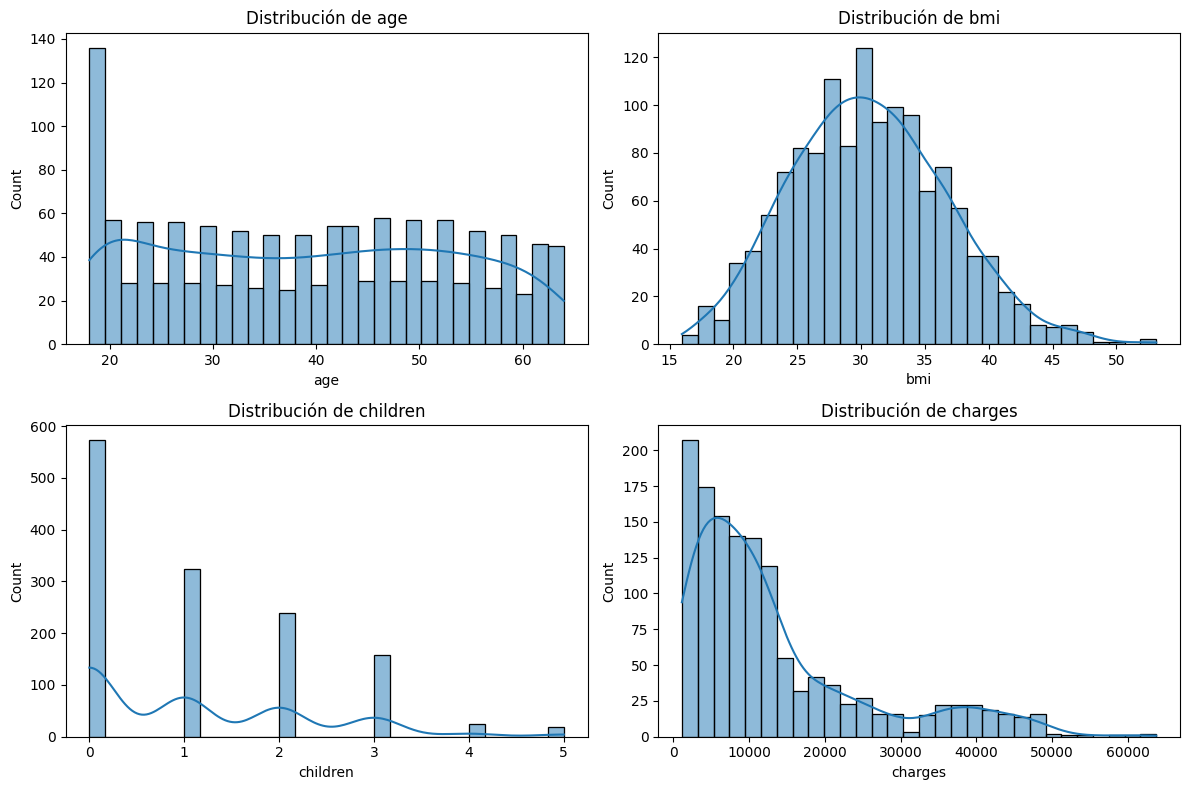

In [60]:
# Lista de variables numéricas
num_vars = ["age", "bmi", "children", "charges"]

# Visualización de distribuciones de las variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, var in enumerate(num_vars):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

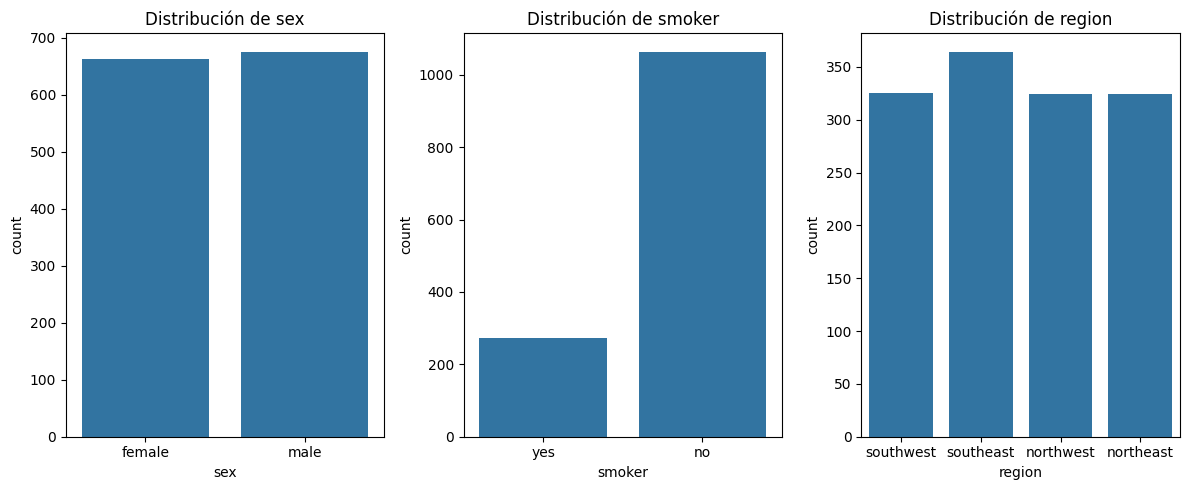

In [61]:
# Lista variables categóricas
cat_vars = ["sex", "smoker", "region"]

# Representación de distribuciones de las variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}")

plt.tight_layout()
plt.show()

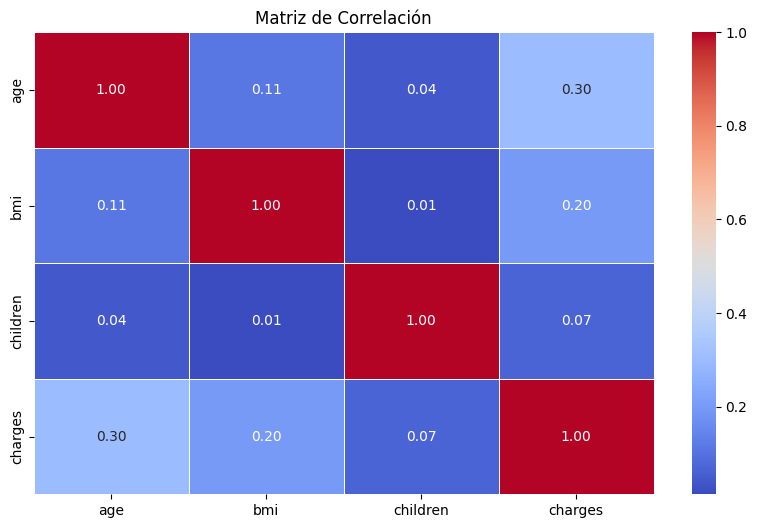

In [62]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

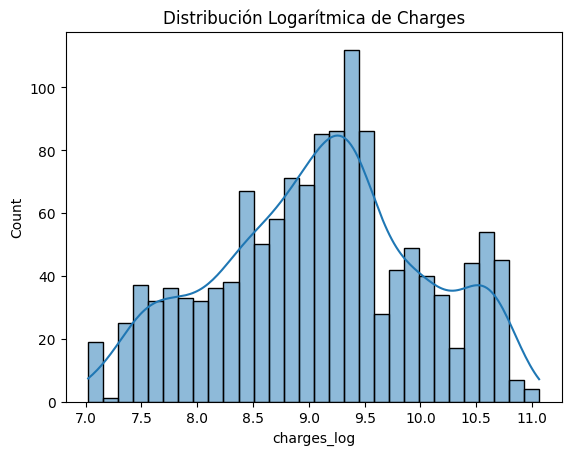

In [63]:
# Transformación de variables
# Aplicamos logaritmo a charges
df["charges_log"] = np.log(df["charges"])

# Ver la nueva distribución después del ajuste
sns.histplot(df["charges_log"], kde=True, bins=30)
plt.title("Distribución Logarítmica de Charges")
plt.show()

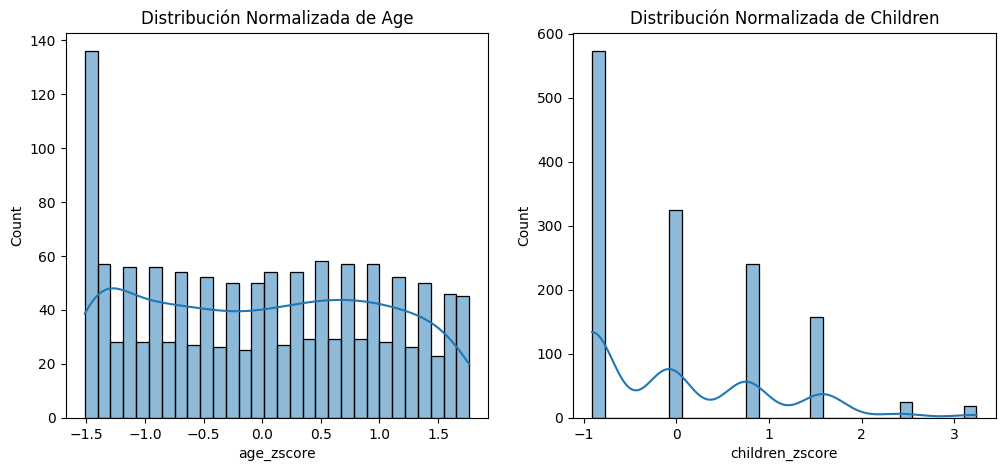

In [64]:
#Normalización con z-score

# Normalizamos age y children
df["age_zscore"] = zscore(df["age"])
df["children_zscore"] = zscore(df["children"])

# Visualizamos la nueva distribución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["age_zscore"], kde=True, bins=30, ax=axes[0])
sns.histplot(df["children_zscore"], kde=True, bins=30, ax=axes[1])
axes[0].set_title("Distribución Normalizada de Age")
axes[1].set_title("Distribución Normalizada de Children")
plt.show()

In [65]:
# Transformación de variables categóricas
# Codificación One-Hot encoding para region

df = pd.get_dummies(df, columns=["region"], drop_first=True)

In [66]:
# Codificación binaria para sex y smoker

df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

# Valores faltantes e imputación

In [67]:
# Revisar porcentaje de valores
# Porcentaje de valores faltantes por columna
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Mostrar solo columnas con valores faltantes
missing_data = pd.DataFrame({"Valores Faltantes": missing_values, "Porcentaje": missing_percent})
missing_data = missing_data[missing_data["Valores Faltantes"] > 0]

print("Valores faltantes en el dataset:")
print(missing_data)


Valores faltantes en el dataset:
Empty DataFrame
Columns: [Valores Faltantes, Porcentaje]
Index: []


# Partición del dataset en conjunto de entrenamiento y test

In [68]:
# Definir X e y (Variables Independientes y Dependientes)
X = df.drop(columns=["charges", "charges_log"])  # Eliminamos la versión original
y = df["charges_log"]  # Usamos la versión transformada

In [69]:
# División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de Train: {X_train.shape}")
print(f"Tamaño de Test: {X_test.shape}")

Tamaño de Train: (1069, 10)
Tamaño de Test: (268, 10)


# Observaciones influyentes en el conjunto de entrenamiento

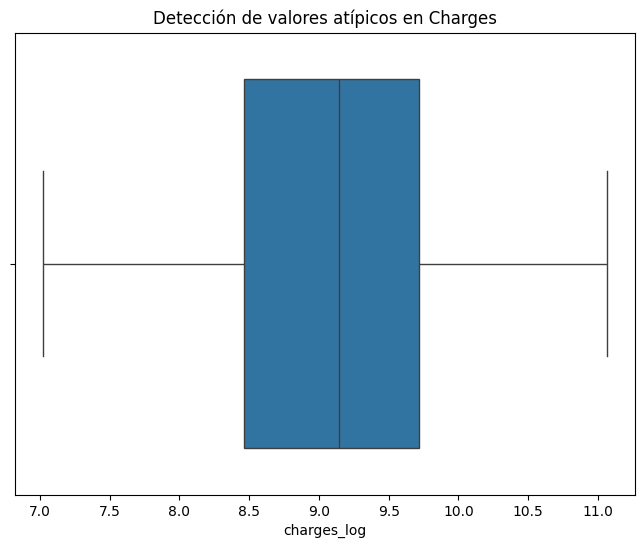

In [70]:
# Detección de valores atípicos
# Gráfico de caja para detectar outliers en charges_log
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["charges_log"])
plt.title("Detección de valores atípicos en Charges")
plt.show()

In [71]:
# Identificación de outliers con IQR (Rango Intercualtil)
# Calculamos los límites superior e inferior para detectar valores extremos.
Q1 = df["charges_log"].quantile(0.25)  # Primer cuartil
Q3 = df["charges_log"].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango Intercuartil

# Definimos límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los valores atípicos
outliers = df[(df["charges_log"] < limite_inferior) | (df["charges_log"] > limite_superior)]
print(f"Total de valores atípicos detectados: {outliers.shape[0]}")

Total de valores atípicos detectados: 0


# Construcción del Pipeline y Primer Entrenamiento

In [72]:
# Definir el Pipeline con escalado y regresión lineal
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Escalamos las variables
    ("modelo", LinearRegression())  # Aplicamos regresión lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


# Evaluación del modelo

In [73]:
#Medimos el rendimiento del modelo con métricas clave (R², MAE, MSE, RMSE).

#Predicciones
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

#Métricas de evaluación
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"R² en Train: {r2_train:.4f}")
print(f"R² en Test: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

R² en Train: 0.7496
R² en Test: 0.8295
MAE: 0.2607
MSE: 0.1583
RMSE: 0.3979


# Optimización del modelo

In [74]:
#Vamos a probar una regresión regularizada (Ridge y Lasso) para mejorar el rendimiento.
#Entrenar modelo Ridge y Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

#Evaluación
r2_ridge = ridge.score(X_test, y_test)
r2_lasso = lasso.score(X_test, y_test)

print(f"R² con Ridge: {r2_ridge:.4f}")
print(f"R² con Lasso: {r2_lasso:.4f}")

R² con Ridge: 0.8291
R² con Lasso: 0.7180


# Guardar el modelo entrenado

In [75]:
joblib.dump(ridge, "modelo_ridge.pkl")

print("Modelo Ridge guardado exitosamente.")

Modelo Ridge guardado exitosamente.


# Predicción y validación final 

In [76]:
#Cargar el modelo guardado
modelo_cargado = joblib.load("modelo_ridge.pkl")

#Definir características del nuevo cliente
nuevo_cliente_dict = {
    "age": 40,
    "sex": 1,  # Female
    "bmi": 25,
    "children": 3,
    "smoker": 0,  # No fumador
    "age_zscore": (40 - X_train["age"].mean()) / X_train["age"].std(),  # Normalización igual que en entrenamiento
    "children_zscore": (3 - X_train["children"].mean()) / X_train["children"].std(),
    "region_northwest": 0,
    "region_southeast": 0,
    "region_southwest": 0
}

#Convertir a DataFrame y asegurar que las columnas coincidan con el modelo
nuevo_cliente_df = pd.DataFrame([nuevo_cliente_dict])
nuevo_cliente_df = nuevo_cliente_df.reindex(columns=X_train.columns, fill_value=0)  # Rellenar valores faltantes

#Predicción del costo del seguro
costo_estimado = modelo_cargado.predict(nuevo_cliente_df)
print(f"Predicción del coste del seguro: {np.exp(costo_estimado)[0]:.2f} USD")  # Inversión del logaritmo

Predicción del coste del seguro: 8432.83 USD
